# Importação de bibliotecas

In [2]:
import pandas as pd
import numpy as np

# Recuperação dos dados

In [3]:
train = pd.read_csv("data/train.csv")
teste = pd.read_csv("data/test.csv")

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Função para transformar variável nominal em número
def transformar_sexo(valor):
    if valor == 'female':
        return 1
    else:
        return 0

train['Sexo_binario'] = train['Sex'].map(transformar_sexo)
teste['Sexo_binario'] = teste['Sex'].map(transformar_sexo)

# Desenvolvimento e teste de soluções

In [6]:
# Importação do classificador
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedKFold

In [7]:
# Variáveis que serão utilizadas
variaveis = ['Sexo_binario', 'Age']

In [8]:
# Recuperação apenas dos dados que serão utilizados
X = train[variaveis]
y = train['Survived']

In [9]:
# Preenchimento de dados nulos
X = X.fillna(-1)

### Validação Cruzada

In [10]:
# Execução real com validação cruzada
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)

resultados = []
for linhas_treino, linhas_valid in kf.split(X):
    print("Treino: ", linhas_treino.shape[0])
    print("Validação: ", linhas_valid.shape[0])

    # Separa o X e y de treinamento e validação
    X_treino, X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
    y_treino, y_valid= y.iloc[linhas_treino], y.iloc[linhas_valid]

    # Treina o modelo com os dados destacados para treino na execução
    modelo_floresta = RandomForestClassifier(n_estimators=100, n_jobs=1, random_state=0)
    modelo_floresta.fit(X_treino,y_treino)

    p = modelo_floresta.predict(X_valid)
    acc = np.mean(y_valid == p)
    resultados.append(acc)
    print("Acc: ", acc)
    print()

Treino:  445
Validação:  446
Acc:  0.7511210762331838

Treino:  446
Validação:  445
Acc:  0.7617977528089888

Treino:  445
Validação:  446
Acc:  0.7533632286995515

Treino:  446
Validação:  445
Acc:  0.7595505617977528

Treino:  445
Validação:  446
Acc:  0.7690582959641256

Treino:  446
Validação:  445
Acc:  0.7573033707865169

Treino:  445
Validação:  446
Acc:  0.7399103139013453

Treino:  446
Validação:  445
Acc:  0.7595505617977528

Treino:  445
Validação:  446
Acc:  0.7354260089686099

Treino:  446
Validação:  445
Acc:  0.797752808988764

Treino:  445
Validação:  446
Acc:  0.7690582959641256

Treino:  446
Validação:  445
Acc:  0.7640449438202247

Treino:  445
Validação:  446
Acc:  0.7757847533632287

Treino:  446
Validação:  445
Acc:  0.7573033707865169

Treino:  445
Validação:  446
Acc:  0.7556053811659192

Treino:  446
Validação:  445
Acc:  0.7640449438202247

Treino:  445
Validação:  446
Acc:  0.7443946188340808

Treino:  446
Validação:  445
Acc:  0.7595505617977528

Treino:  44

In [11]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [12]:
# Média das previsões
np.mean(resultados)

0.759601451100922

(array([2., 1., 3., 6., 4., 2., 1., 0., 0., 1.]),
 array([0.73542601, 0.74165869, 0.74789137, 0.75412405, 0.76035673,
        0.76658941, 0.77282209, 0.77905477, 0.78528745, 0.79152013,
        0.79775281]),
 <BarContainer object of 10 artists>)

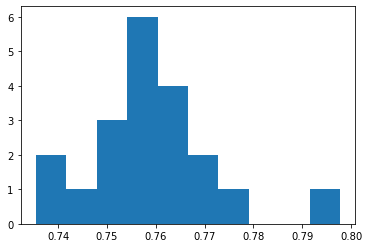

In [13]:
# Plota o histograma de resultados
pylab.hist(resultados)

### Treino com novas variáveis

In [14]:
# Variáveis que serão utilizadas
variaveis = ['Sexo_binario', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare']

In [15]:
# Recuperação apenas dos dados que serão utilizados
X = train[variaveis].fillna(-1)
y = train['Survived']

In [16]:
# Execução real com validação cruzada
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)

resultados = []
for linhas_treino, linhas_valid in kf.split(X):
    print("Treino: ", linhas_treino.shape[0])
    print("Validação: ", linhas_valid.shape[0])

    # Separa o X e y de treinamento e validação
    X_treino, X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
    y_treino, y_valid= y.iloc[linhas_treino], y.iloc[linhas_valid]

    # Treina o modelo com os dados destacados para treino na execução
    modelo_floresta = RandomForestClassifier(n_estimators=100, n_jobs=1, random_state=0)
    modelo_floresta.fit(X_treino,y_treino)

    p = modelo_floresta.predict(X_valid)
    acc = np.mean(y_valid == p)
    resultados.append(acc)
    print("Acc: ", acc)
    print()

Treino:  445
Validação:  446
Acc:  0.7869955156950673

Treino:  446
Validação:  445
Acc:  0.7797752808988764

Treino:  445
Validação:  446
Acc:  0.827354260089686

Treino:  446
Validação:  445
Acc:  0.8179775280898877

Treino:  445
Validação:  446
Acc:  0.7847533632286996

Treino:  446
Validação:  445
Acc:  0.7842696629213484

Treino:  445
Validação:  446
Acc:  0.8161434977578476

Treino:  446
Validação:  445
Acc:  0.7842696629213484

Treino:  445
Validação:  446
Acc:  0.8004484304932735

Treino:  446
Validação:  445
Acc:  0.8

Treino:  445
Validação:  446
Acc:  0.8183856502242153

Treino:  446
Validação:  445
Acc:  0.802247191011236

Treino:  445
Validação:  446
Acc:  0.8116591928251121

Treino:  446
Validação:  445
Acc:  0.8067415730337079

Treino:  445
Validação:  446
Acc:  0.820627802690583

Treino:  446
Validação:  445
Acc:  0.7887640449438202

Treino:  445
Validação:  446
Acc:  0.8385650224215246

Treino:  446
Validação:  445
Acc:  0.8044943820224719

Treino:  445
Validação:  446

### Análise do erro

In [17]:
# Copia os últimos registros usados em validação e adiciona a coluna com o valor da previsão realizada
X_valid_check = train.iloc[linhas_valid].copy()
X_valid_check['p'] = p
X_valid_check.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sexo_binario,p
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0


In [18]:
# Copia para um novo dataframe apenas os registros onde a previsão foi errada
erros = X_valid_check[X_valid_check['Survived'] != X_valid_check['p']]
erros = erros[['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Sexo_binario', 'p', 'Survived']]
erros.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sexo_binario,p,Survived
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,1
21,22,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S,0,0,1
22,23,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q,1,0,1
23,24,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S,0,0,1
25,26,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S,1,0,1


In [19]:
# Separam dois dataframes apenas com erros por sexo
mulheres = erros[erros['Sex'] == 'female']
homens = erros[erros['Sex'] == 'male']

In [20]:
# Checa os valores de erros de mulheres para verificar se existem dados que podem ser utilizados para diminuir o erro
mulheres.sort_values("Survived")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sexo_binario,p,Survived
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1,1,0
501,502,3,"Canavan, Miss. Mary",female,21.0,0,0,364846,7.7500,NaN,Q,1,1,0
498,499,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S,1,1,0
882,883,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S,1,1,0
474,475,3,"Strandberg, Miss. Ida Sofia",female,22.0,0,0,7553,9.8375,NaN,S,1,1,0
419,420,3,"Van Impe, Miss. Catharina",female,10.0,0,2,345773,24.1500,NaN,S,1,1,0
357,358,2,"Funk, Miss. Annie Clemmer",female,38.0,0,0,237671,13.0000,NaN,S,1,1,0
254,255,3,"Rosblom, Mrs. Viktor (Helena Wilhelmina)",female,41.0,0,2,370129,20.2125,NaN,S,1,1,0
503,504,3,"Laitinen, Miss. Kristina Sofia",female,37.0,0,0,4135,9.5875,NaN,S,1,1,0
654,655,3,"Hegarty, Miss. Hanora ""Nora""",female,18.0,0,0,365226,6.7500,NaN,Q,1,1,0


In [21]:
homens.sort_values("Survived")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sexo_binario,p,Survived
238,239,2,"Pengelly, Mr. Frederick William",male,19.00,0,0,28665,10.5000,NaN,S,0,1,0
442,443,3,"Petterson, Mr. Johan Emil",male,25.00,1,0,347076,7.7750,NaN,S,0,1,0
422,423,3,"Zimmerman, Mr. Leo",male,29.00,0,0,315082,7.8750,NaN,S,0,1,0
373,374,1,"Ringhini, Mr. Sante",male,22.00,0,0,PC 17760,135.6333,NaN,C,0,1,0
371,372,3,"Wiklund, Mr. Jakob Alfred",male,18.00,1,0,3101267,6.4958,NaN,S,0,1,0
698,699,1,"Thayer, Mr. John Borland",male,49.00,1,1,17421,110.8833,C68,C,0,1,0
262,263,1,"Taussig, Mr. Emil",male,52.00,1,1,110413,79.6500,E67,S,0,1,0
231,232,3,"Larsson, Mr. Bengt Edvin",male,29.00,0,0,347067,7.7750,NaN,S,0,1,0
214,215,3,"Kiernan, Mr. Philip",male,NaN,1,0,367229,7.7500,NaN,Q,0,1,0
721,722,3,"Jensen, Mr. Svend Lauritz",male,17.00,1,0,350048,7.0542,NaN,S,0,1,0


### Novas variáveis

In [22]:
train['Embarked_S'] = (train['Embarked'] == 'S').astype(int)
train['Embarked_C'] = (train['Embarked'] == 'C').astype(int)
#train['Embarked_Q'] = (train['Embarked'] == 'Q').astype(int)

train['Cabine_nula'] = train['Cabin'].isnull().astype(int)

train['Nome_contem_Miss'] = train['Name'].str.contains("Miss").astype(int)
train['Nome_contem_Mrs'] = train['Name'].str.contains("Mrs").astype(int)

train['Nome_contem_Master'] = train['Name'].str.contains("Master").astype(int)
train['Nome_contem_Col'] = train['Name'].str.contains("Col").astype(int)
train['Nome_contem_Major'] = train['Name'].str.contains("Major").astype(int)
train['Nome_contem_Mr'] = train['Name'].str.contains("Mr").astype(int)

In [23]:
# Variáveis que serão utilizadas
variaveis = ['Sexo_binario', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Embarked_S', 'Embarked_C', 'Cabine_nula',
            'Nome_contem_Miss', 'Nome_contem_Mrs', 'Nome_contem_Master', 'Nome_contem_Col', 'Nome_contem_Major',
            'Nome_contem_Mr']

In [24]:
# Recuperação apenas dos dados que serão utilizados
X = train[variaveis].fillna(-1)
y = train['Survived']

In [25]:
# Testa outro tipo de classificador
from sklearn.linear_model import LogisticRegression

In [34]:
# Execução real com validação cruzada
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)

resultados2 = []
for linhas_treino, linhas_valid in kf.split(X):
    print("Treino: ", linhas_treino.shape[0])
    print("Validação: ", linhas_valid.shape[0])

    # Separa o X e y de treinamento e validação
    X_treino, X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
    y_treino, y_valid= y.iloc[linhas_treino], y.iloc[linhas_valid]

    # Treina o modelo com os dados destacados para treino na execução
    modelo_regressao = LogisticRegression()
    modelo_regressao.fit(X_treino,y_treino)

    p = modelo_regressao.predict(X_valid)
    acc = np.mean(y_valid == p)
    resultados2.append(acc)
    print("Acc: ", acc)
    print()

Treino:  445
Validação:  446
Acc:  0.8318385650224215

Treino:  446
Validação:  445
Acc:  0.8067415730337079

Treino:  445
Validação:  446


C:\Users\Yuri Guerra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Yuri Guerra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

Acc:  0.8161434977578476

Treino:  446
Validação:  445
Acc:  0.802247191011236

Treino:  445
Validação:  446


C:\Users\Yuri Guerra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Yuri Guerra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

Acc:  0.8161434977578476

Treino:  446
Validação:  445
Acc:  0.8157303370786517

Treino:  445
Validação:  446


C:\Users\Yuri Guerra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Yuri Guerra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

Acc:  0.8183856502242153

Treino:  446
Validação:  445
Acc:  0.8089887640449438

Treino:  445
Validação:  446
Acc:  0.8183856502242153

Treino:  446
Validação:  445


C:\Users\Yuri Guerra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Yuri Guerra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

Acc:  0.8157303370786517

Treino:  445
Validação:  446
Acc:  0.827354260089686

Treino:  446
Validação:  445


C:\Users\Yuri Guerra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Yuri Guerra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

Acc:  0.8134831460674158

Treino:  445
Validação:  446
Acc:  0.8408071748878924

Treino:  446
Validação:  445
Acc:  0.802247191011236

Treino:  445
Validação:  446


C:\Users\Yuri Guerra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Yuri Guerra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

Acc:  0.8071748878923767

Treino:  446
Validação:  445
Acc:  0.8044943820224719

Treino:  445
Validação:  446


C:\Users\Yuri Guerra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Yuri Guerra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

Acc:  0.8385650224215246

Treino:  446
Validação:  445
Acc:  0.8157303370786517

Treino:  445
Validação:  446
Acc:  0.8363228699551569

Treino:  446
Validação:  445
Acc:  0.8269662921348314



C:\Users\Yuri Guerra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Yuri Guerra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

Média dos resultados anterior:  0.8041457147175896
Média dos resultados atuais:  0.8181740313397492


((array([3., 3., 1., 5., 2., 0., 2., 1., 1., 2.]),
  array([0.80224719, 0.80610319, 0.80995919, 0.81381519, 0.81767118,
         0.82152718, 0.82538318, 0.82923918, 0.83309518, 0.83695118,
         0.84080717]),
  <BarContainer object of 10 artists>),
 (array([4., 2., 0., 4., 2., 2., 4., 0., 1., 1.]),
  array([0.77977528, 0.78565426, 0.79153323, 0.7974122 , 0.80329118,
         0.80917015, 0.81504913, 0.8209281 , 0.82680707, 0.83268605,
         0.83856502]),
  <BarContainer object of 10 artists>))

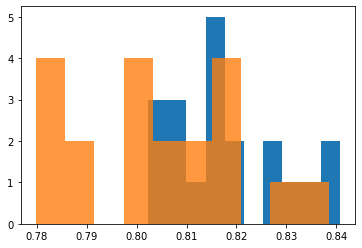

In [35]:
# Média das previsões
print("Média dos resultados anterior: ", np.mean(resultados))
print("Média dos resultados atuais: ", np.mean(resultados2))
# Plota o histograma de comparação de resultados

pylab.hist(resultados2), pylab.hist(resultados, alpha=0.8)

### Retreina o modelo utilizando todos os registros e as variáveis selecionadas

In [36]:
teste['Embarked_S'] = (teste['Embarked'] == 'S').astype(int)
teste['Embarked_C'] = (teste['Embarked'] == 'C').astype(int)
#teste['Embarked_Q'] = (teste['Embarked'] == 'Q').astype(int)

teste['Cabine_nula'] = teste['Cabin'].isnull().astype(int)

teste['Nome_contem_Miss'] = teste['Name'].str.contains("Miss").astype(int)
teste['Nome_contem_Mrs'] = teste['Name'].str.contains("Mrs").astype(int)

teste['Nome_contem_Master'] = teste['Name'].str.contains("Master").astype(int)
teste['Nome_contem_Col'] = teste['Name'].str.contains("Col").astype(int)
teste['Nome_contem_Major'] = teste['Name'].str.contains("Major").astype(int)
teste['Nome_contem_Mr'] = teste['Name'].str.contains("Mr").astype(int)

In [37]:
teste[variaveis].head()

,Sexo_binario,Age,Pclass,SibSp,Parch,Fare,Embarked_S,Embarked_C,Cabine_nula,Nome_contem_Miss,Nome_contem_Mrs,Nome_contem_Master,Nome_contem_Col,Nome_contem_Major,Nome_contem_Mr
0,0,34.5,3,0,0,7.8292,0,0,1,0,0,0,0,0,1
1,1,47.0,3,1,0,7.0000,1,0,1,0,1,0,0,0,1
2,0,62.0,2,0,0,9.6875,0,0,1,0,0,0,0,0,1
3,0,27.0,3,0,0,8.6625,1,0,1,0,0,0,0,0,1
4,1,22.0,3,1,1,12.2875,1,0,1,0,1,0,0,0,1


In [38]:
# Treina o modelo com os dados destacados para treino na execução
modelo_regressao = LogisticRegression()
modelo_regressao.fit(X,y)

p = modelo_regressao.predict(teste[variaveis].fillna(-1))

C:\Users\Yuri Guerra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
p

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

# Criar submission para o Kaggle

In [40]:
sub = pd.Series(p, index=teste['PassengerId'], name='Survived')
sub.shape

(418,)

In [43]:
sub.to_csv("output/LogisticRegressionModelV6.csv", header=True)